In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
import numpy as np
import warnings


In [7]:
df_train = pd.read_csv('./train.csv')
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df_train.shape

(1460, 81)

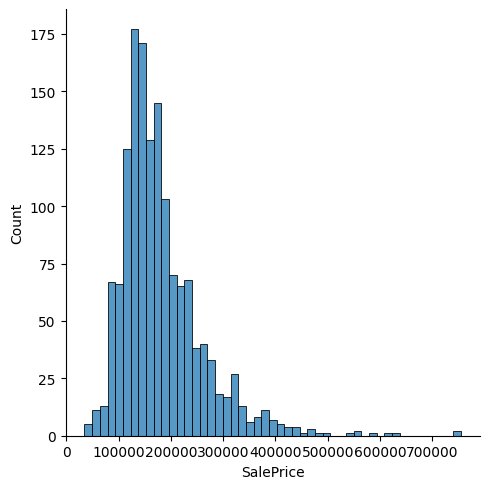

In [19]:
sns.displot(df_train['SalePrice'])

In [20]:
type(df_train)

pandas.core.frame.DataFrame

In [22]:
df_train['SalePrice'].skew()

np.float64(1.8828757597682129)

In [23]:
df_train['SalePrice'].kurt()


np.float64(6.536281860064529)

In [24]:
#  see relation between two columns
# build a new data frame with those two columns
# axis 1 -> columns

In [28]:
n1 = 'SalePrice'
n2 = 'GrLivArea'

In [29]:
df_new = pd.concat([df_train[n1], df_train[n2]], axis=1)

In [30]:
df_new.head(10)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

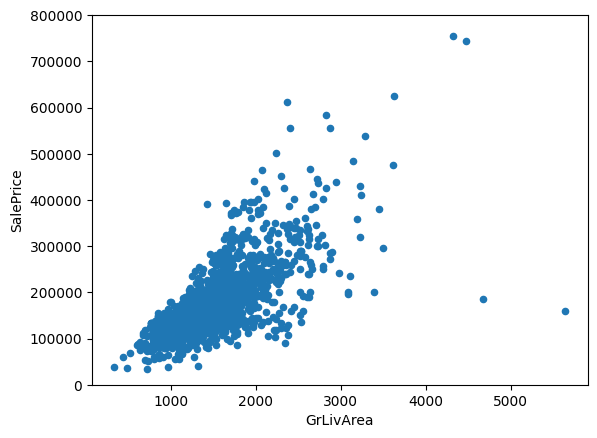

In [31]:
df_new.plot.scatter(x=n2, y=n1, ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

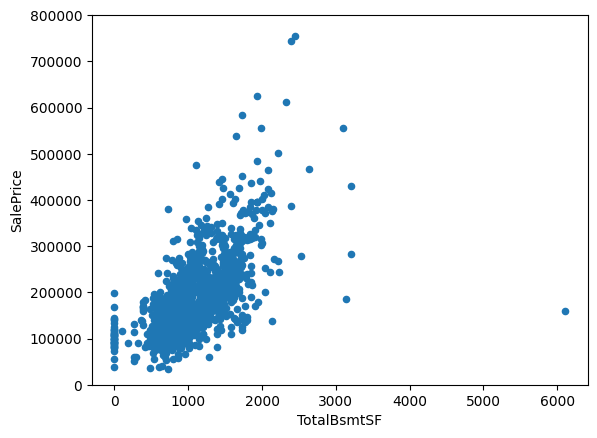

In [38]:
n1 = 'SalePrice'
n2 = 'TotalBsmtSF'
df_new = pd.concat([df_train[n1], df_train[n2]], axis=1)
df_new.plot.scatter(x=n2, y=n1, ylim=(0, 800000))


In [39]:
# categorical comprehension

In [42]:
df_train['OverallQual'].head(10)

0    7
1    6
2    7
3    7
4    8
5    5
6    8
7    7
8    7
9    5
Name: OverallQual, dtype: int64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

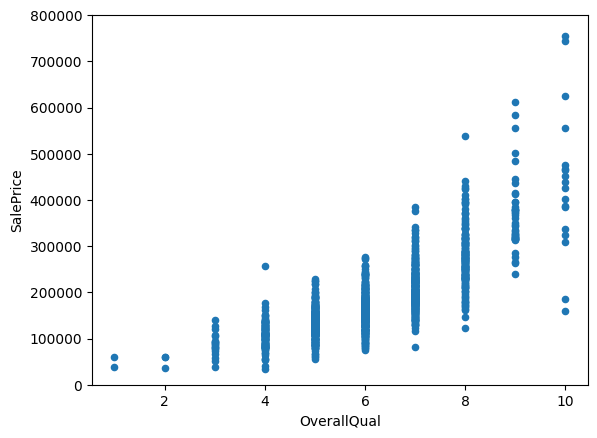

In [44]:
n1 = 'SalePrice'
n2 = 'OverallQual'
df_new = pd.concat([df_train[n1], df_train[n2]], axis=1)
df_new.plot.scatter(x=n2, y=n1, ylim=(0, 800000))

(np.float64(-0.5), np.float64(9.5), np.float64(0.0), np.float64(800000.0))

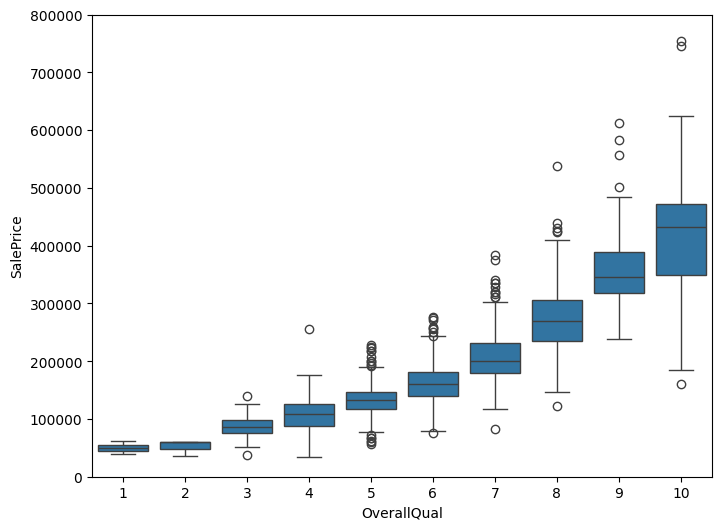

In [47]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=n2, y=n1, data=df_new)
fig.axis(ymin=0, ymax=800000)

In [49]:
n2 = 'YearBuilt'
df_new = pd.concat([df_train[n1], df_train[n2]], axis=1)
df_new.head(10)

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000
5,143000,1993
6,307000,2004
7,200000,1973
8,129900,1931
9,118000,1939


In [51]:
df_new.describe()

,SalePrice,YearBuilt
count,1460.000000,1460.000000
mean,180921.195890,1971.267808
std,79442.502883,30.202904
min,34900.000000,1872.000000
25%,129975.000000,1954.000000
50%,163000.000000,1973.000000
75%,214000.000000,2000.000000
max,755000.000000,2010.000000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

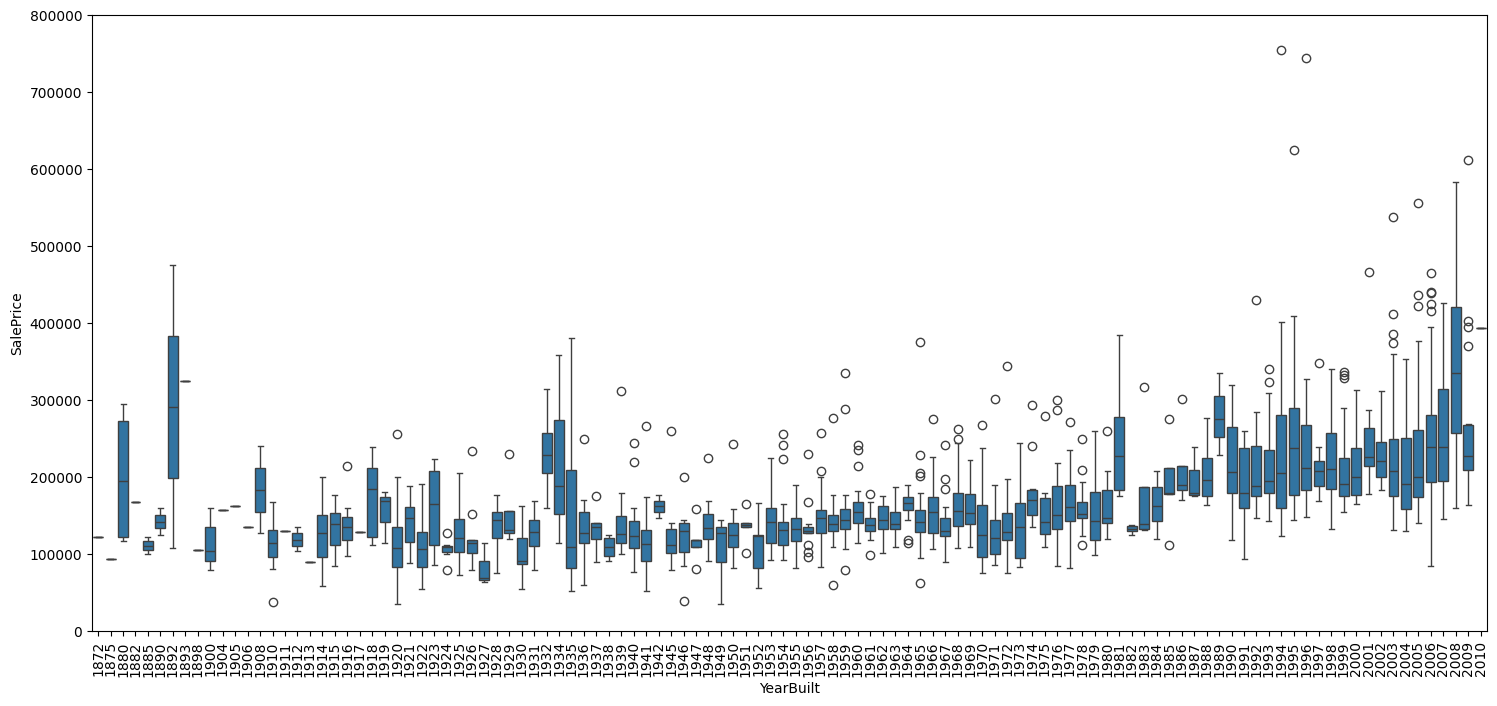

In [54]:
f, ax = plt.subplots(figsize=(18,8))
fig = sns.boxplot(x=n2, y=n1, data=df_new)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In [55]:
# heatmap

In [61]:
mat = df_train.corr(numeric_only=True)
mat.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

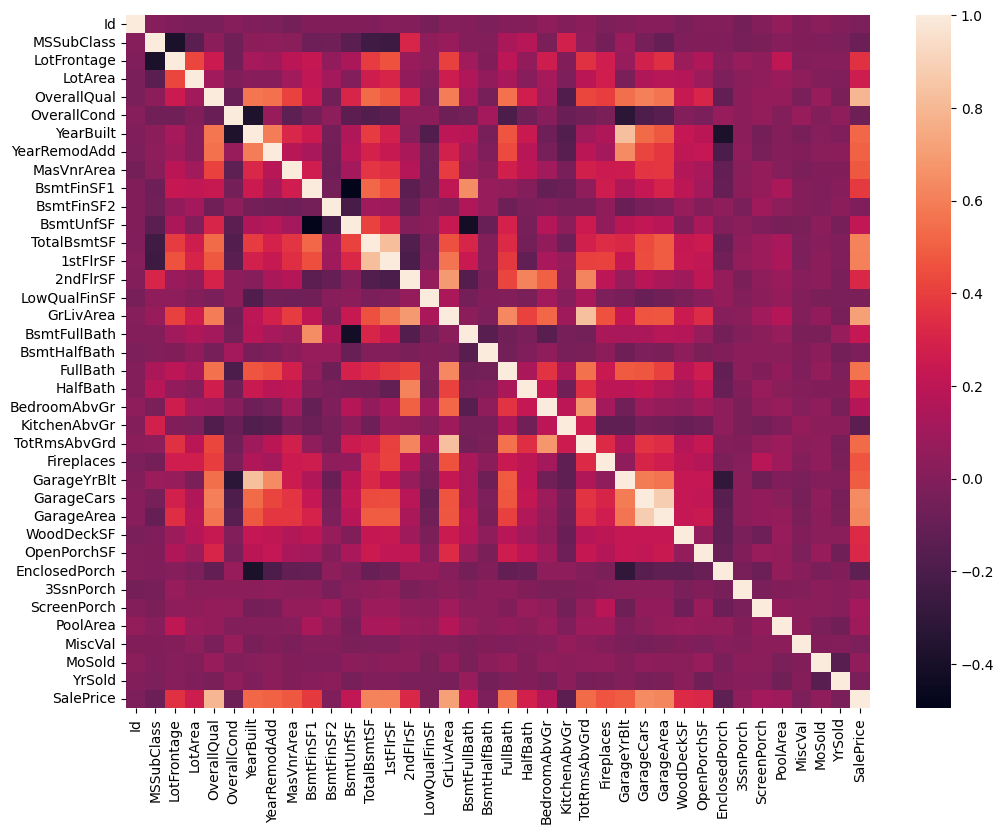

In [64]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(mat)

In [1]:
import random
random.seed = 10


In [6]:
random.random()

0.2406635494871836

In [42]:
random.randint(0, 1)

1

In [98]:
random.randrange(0,10+1, 2)

4

In [138]:
x=[(random.randint(0,10), random.randint(0,10)) for i in range(2000)]

In [139]:
df_random = pd.DataFrame(data=x, columns=['x','y'])
df_random.head(10)

,x,y
0,10,1
1,9,10
2,10,0
3,3,2
4,8,6
5,9,8
6,6,4
7,9,9
8,10,10
9,9,4


<Axes: xlabel='x', ylabel='y'>

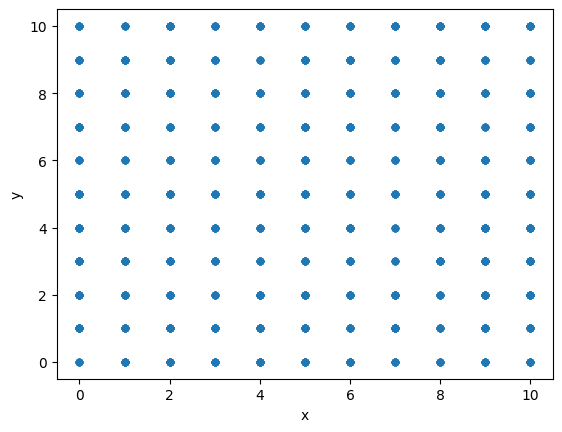

In [140]:
df_random.plot.scatter(x=0, y=1)

<Axes: xlabel='x', ylabel='y'>

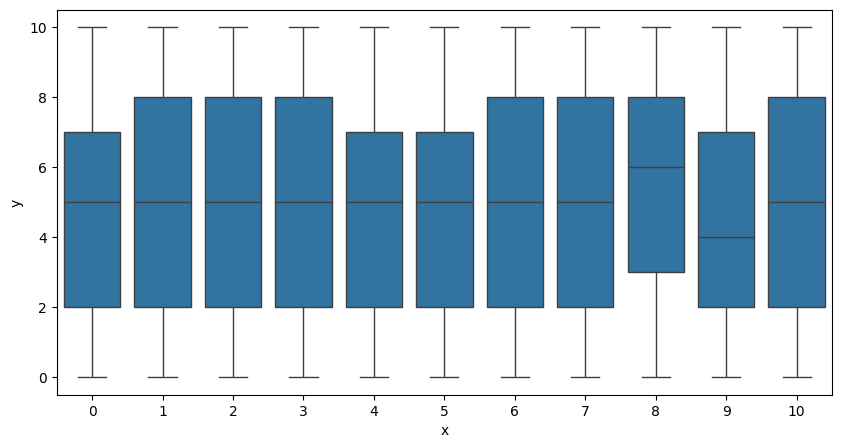

In [141]:

df_random = pd.DataFrame(data=x, columns=['x','y'])
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_random, x='x', y='y')


In [142]:
import statistics 

In [146]:
n = [random.randrange(10,100, 10) for _ in range(100)]

In [147]:
statistics.mean(n)

53.7

In [148]:
statistics.median(n)

60.0

In [150]:
statistics.stdev(n)

24.604138602349735

In [151]:
np.mean(n)

np.float64(53.7)

In [2]:
class Node:
    def __init__(self) -> None:
        self.info = None
        self.next = None
        self.prev = None
class LinkedList:
    def __init__(self) -> None:
        self.first = None
        self.current = None
        self.count = 0
    def append(self, t):
        if self.first is None:
            self.first = Node()
            self.first.info = t
            self.current = self.first
            self.count += 1
            return
        current = self.current
        prev = Node
        while current is not None:
            prev = current
            current = current.next
        current = Node()
        current.info = t
        current.prev = prev
        prev.next = current
        self.current = current
        self.count += 1
    def print(self):
        current = self.first
        while current is not None:
            print(current.info)
            current = current.next
    def print_reverse(self):
        current = self.current
        while current is not None:
            print(current.info)
            current = current.prev
    def indexOf(self, t):
        current = self.first
        index = 0
        while current is not None:
            if current.info is t:
                return index
            current = current.next
            index += 1
        print(f'{t} not found')
    def findIndex(self, i: int):
        if i >= self.count or i < 0:
            print(f'invalid index: {i}')
            return None
        index = 0
        current = self.first
        while current is not None:
            if index is i:
                return current.info
            current = current.next
            index += 1

        

In [3]:
my_list = LinkedList()
my_list.append('lenin')
my_list.append('hana')
my_list.append('sana')
my_list.append(123)
my_list.print_reverse()
print(my_list.count)
print(my_list.indexOf('sana'))
print(my_list.findIndex(3))


123
sana
hana
lenin
4
2
123


In [2]:
ft = ()
ft = (1,2)
ft[0] = 1

TypeError: 'tuple' object does not support item assignment

In [4]:
for i in ft:
    print(i)
tf = (123, 456)
fg, fh = tf
print(fg)
print(fh)

1
2
123
456


In [12]:
p = [2**i for i in range(10)]
print(p)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [17]:
pp = p[4:6]
print(pp)
pp = p[:5]
print(pp)
pp = p[5:]
print(pp)

[16, 32]
[1, 2, 4, 8, 16]
[32, 64, 128, 256, 512]


In [19]:
import random
l = [random.randint(0, 100) for _ in range(100)]
print(l)

[36, 18, 99, 90, 78, 28, 54, 94, 9, 60, 98, 17, 86, 82, 44, 95, 66, 63, 71, 33, 53, 34, 35, 42, 38, 8, 28, 89, 61, 12, 9, 25, 41, 30, 54, 21, 86, 24, 54, 84, 31, 20, 25, 42, 94, 80, 36, 0, 53, 15, 99, 47, 93, 29, 45, 93, 50, 46, 3, 99, 28, 78, 27, 18, 83, 12, 0, 24, 40, 73, 32, 41, 76, 5, 28, 38, 15, 30, 84, 65, 32, 6, 67, 73, 65, 60, 82, 4, 83, 70, 34, 83, 4, 19, 61, 34, 9, 97, 4, 64]


In [28]:
s = sorted(l, reverse=True)
print(s)

[99, 99, 99, 98, 97, 95, 94, 94, 93, 93, 90, 89, 86, 86, 84, 84, 83, 83, 83, 82, 82, 80, 78, 78, 76, 73, 73, 71, 70, 67, 66, 65, 65, 64, 63, 61, 61, 60, 60, 54, 54, 54, 53, 53, 50, 47, 46, 45, 44, 42, 42, 41, 41, 40, 38, 38, 36, 36, 35, 34, 34, 34, 33, 32, 32, 31, 30, 30, 29, 28, 28, 28, 28, 27, 25, 25, 24, 24, 21, 20, 19, 18, 18, 17, 15, 15, 12, 12, 9, 9, 9, 8, 6, 5, 4, 4, 4, 3, 0, 0]


In [31]:
t = (random.randint(0, 100) for _ in range(50))
print(t)
ts = sorted(t)
print(ts)

<generator object <genexpr> at 0x782578283140>
[2, 3, 8, 12, 17, 18, 23, 23, 23, 24, 24, 24, 27, 27, 29, 29, 31, 33, 35, 43, 44, 44, 46, 48, 49, 49, 50, 53, 55, 57, 57, 59, 64, 64, 65, 67, 74, 79, 79, 80, 83, 83, 85, 87, 94, 94, 97, 98, 98, 99]


In [46]:
class Sort:
    def sort(self, t):
        n = t[:]
        for i in range(len(n)-1):
            n1 = n[i]
            n2 = n[i+1]
            if n1 > n2:
                n[i] = n2
                n[i+1] = n1
            for j in range(i, 0, -1):
                r1 = n[j]
                r2 = n[j-1]
                if r2 > r1:
                    n[j] = r2
                    n[j-1] = r1
        return n
l = [random.randint(0,100) for _ in range(50)]
s = Sort()
ns = s.sort(l)
print(ns)

[2, 5, 7, 9, 10, 11, 12, 12, 13, 13, 14, 14, 20, 21, 24, 29, 31, 33, 35, 38, 40, 41, 42, 46, 47, 47, 50, 51, 51, 51, 53, 53, 54, 55, 57, 60, 61, 62, 66, 67, 68, 74, 75, 86, 93, 95, 98, 98, 98, 99]


In [64]:
def generate_list(length):
    l = [random.randint(0,100) for _ in range(length)]
    print(l)
    return l

k = generate_list(20)
k.insert(10, 100)
print(k)
k.remove(100)
print(k)

[19, 97, 74, 77, 18, 71, 59, 20, 29, 58, 50, 26, 1, 85, 88, 44, 23, 43, 50, 0]
[19, 97, 74, 77, 18, 71, 59, 20, 29, 58, 100, 50, 26, 1, 85, 88, 44, 23, 43, 50, 0]
[19, 97, 74, 77, 18, 71, 59, 20, 29, 58, 50, 26, 1, 85, 88, 44, 23, 43, 50, 0]


In [65]:
# Write a Python program to sum all the items in a list.
l = generate_list(3)
s = 0
for i in l:
    s += i
print(s)

[14, 100, 13]
127


In [69]:
# Write a Python program to multiply all the items in a list.
l = generate_list(10)
m = 1
for i in l:
    m *= i
print(m)

[35, 88, 96, 83, 76, 10, 14, 23, 63, 82]
31025865662668800


In [70]:
# Write a Python program to get the largest number from a list.
l = generate_list(10)
largest = 0
for i in l:
    if i > largest:
        largest = i
print(largest)

[0, 42, 72, 42, 97, 36, 94, 1, 38, 31]
97


In [72]:
# Write a Python program to get the smallest number from a list.
l = generate_list(10)
smallest = l[0]
for i in l:
    if i < smallest:
        smallest = i
print(smallest)

[3, 23, 66, 2, 93, 11, 12, 92, 44, 12]
2


In [74]:
# Write a Python program to count the number of strings from a given list of strings. The string length is 2 or more and the first and last characters are the same.
# Sample List : ['abc', 'xyz', 'aba', '1221']
# Expected Result : 2 
sl = ['dfgd', 'wer', 'dfg', 'gsdg', 'gn', 'dsdfd']
c = 0
for s in sl:
    if len(s) > 2:
        if s[0] == s[-1]:
            c += 1
print(c)

3


In [1]:
lista = [(i, i**2) for i in range(11) if i%2 == 0]
lista

[(0, 0), (2, 4), (4, 16), (6, 36), (8, 64), (10, 100)]

In [3]:
lista = (i for i in range(11))
lista

<generator object <genexpr> at 0x72b6d0f7c340>

In [5]:
list(lista)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
lista = list(range(10))
lista = filter(lambda x: x%2==0, lista)
list(lista)

[0, 2, 4, 6, 8]

In [12]:
lista = list(range(10))
lista = list(map(lambda x: x**3, lista))
lista

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [18]:
m = [[i for i in range(0, 10, 2)] for j in range(0, 10, 3)]
m

[[0, 2, 4, 6, 8], [0, 2, 4, 6, 8], [0, 2, 4, 6, 8], [0, 2, 4, 6, 8]]